# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [9]:
# import libraries
import nltk
nltk.download(['punkt', 'wordnet', 'averaged_perceptron_tagger','omw-1.4'])
from sqlalchemy import create_engine
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
%matplotlib inline
import re
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# !pip install -U scikit-learn
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import SGDClassifier    
from sklearn.base import BaseEstimator
from sklearn.svm import SVC
# from sentence_transformers import SentenceTransformer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\naeem.ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\naeem.ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\naeem.ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\naeem.ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26211,30261,The training demonstrated how to enhance micro...,None,news,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26212,30262,A suitable candidate has been selected and OCH...,None,news,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26213,30263,"Proshika, operating in Cox's Bazar municipalit...",None,news,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26214,30264,"Some 2,000 women protesting against the conduc...",None,news,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


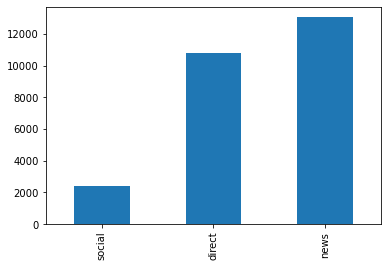

In [17]:
# load data from database
engine = create_engine('sqlite:///disaster_reponse.db')
df = pd.read_sql('combined_df',con=engine)
X = df['message']
Y = df.iloc[:,4:]
df.genre.value_counts().sort_values().plot(kind = 'bar')
df

In [20]:
dic={}
for i,column in enumerate(Y.columns):
    print(Y[column].value_counts())
    dic['column']=column
    dic['']
    

1.0    19906
0.0     6122
2.0      188
Name: related, dtype: int64
0.0    21742
1.0     4474
Name: request, dtype: int64
0.0    26098
1.0      118
Name: offer, dtype: int64
0.0    15356
1.0    10860
Name: aid_related, dtype: int64
0.0    24132
1.0     2084
Name: medical_help, dtype: int64
0.0    24903
1.0     1313
Name: medical_products, dtype: int64
0.0    25492
1.0      724
Name: search_and_rescue, dtype: int64
0.0    25745
1.0      471
Name: security, dtype: int64
0.0    25356
1.0      860
Name: military, dtype: int64
0.0    26216
Name: child_alone, dtype: int64
0.0    24544
1.0     1672
Name: water, dtype: int64
0.0    23293
1.0     2923
Name: food, dtype: int64
0.0    23902
1.0     2314
Name: shelter, dtype: int64
0.0    25811
1.0      405
Name: clothing, dtype: int64
0.0    25612
1.0      604
Name: money, dtype: int64
0.0    25918
1.0      298
Name: missing_people, dtype: int64
0.0    25341
1.0      875
Name: refugees, dtype: int64
0.0    25022
1.0     1194
Name: death, dtype: in

In [61]:
yy=Y.apply(pd.Series.value_counts)
yy= yy.reset_index().rename(columns={'index': 'category'})
yy =yy.melt(id_vars=["category"], 
        var_name="response type", 
        value_name="Value")
yy
dic={}
graphs=[]
for cat in yy.category:

    yy_temp=yy[yy.category==cat]
    
    dic_2={}
    dic_2['x']=yy_temp['response type'].tolist()
    dic_2['y']=yy_temp['Value'].tolist()
    dic_2['name']=cat
    dic[cat]=dic_2
    graphs.append(dic_2)
    

yy=Y.apply(pd.Series.value_counts)    
yy.index.astype(str, copy = False)

Index(['0.0', '1.0', '2.0'], dtype='object')

### 2. Write a tokenization function to process your text data

In [18]:
def tokenize(text):
    url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    detected_urls = re.findall(url_regex, text)
    for url in detected_urls:
        text = text.replace(url, "urlplaceholder")

    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens
class StartingVerbExtractor(BaseEstimator, TransformerMixin):

    def starting_verb(self, text):
        sentence_list = nltk.sent_tokenize(text)
        for sentence in sentence_list:
            pos_tags = nltk.pos_tag(tokenize(sentence))
            first_word, first_tag = pos_tags[0]
            if first_tag in ['VB', 'VBP'] or first_word == 'RT':
                return 1
        return 0

    def fit(self, x, y=None):
        return self

    def transform(self, X):
        X_tagged = pd.Series(X).apply(self.starting_verb)
        return pd.DataFrame(X_tagged)

class ClfSwitcher(BaseEstimator):

    def __init__(
        self, 
        estimator = SGDClassifier(),
    ):
        """
        A Custom BaseEstimator that can switch between classifiers.
        :param estimator: sklearn object - The classifier
        """ 

        self.estimator = estimator


    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self


    def predict(self, X, y=None):
        return self.estimator.predict(X)


    def predict_proba(self, X):
        return self.estimator.predict_proba(X)


    def score(self, X, y):
        return self.estimator.score(X, y)

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [12]:
pipeline = Pipeline([
    ('features', FeatureUnion([

        ('text_pipeline', Pipeline([
            ('vect', CountVectorizer(tokenizer=tokenize)),
            ('tfidf', TfidfTransformer())
        ])),

        ('starting_verb', StartingVerbExtractor())
    ])),

    ('clf', MultiOutputClassifier(RandomForestClassifier()))
])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [16]:

X_train, X_test, y_train, y_test = train_test_split(X, Y)
model = pipeline.fit(X_train,y_train)
y_pred = model.predict(X_test)


0        [weather, update, -, a, cold, front, from, cub...
1        [is, the, hurricane, over, or, is, it, not, over]
2                   [looking, for, someone, but, no, name]
3        [un, report, leogane, 80-90, destroyed, ., onl...
4        [say, :, west, side, of, haiti, ,, rest, of, t...
                               ...                        
26211    [the, training, demonstrated, how, to, enhance...
26212    [a, suitable, candidate, ha, been, selected, a...
26213    [proshika, ,, operating, in, cox, 's, bazar, m...
26214    [some, 2,000, woman, protesting, against, the,...
26215    [a, radical, shift, in, thinking, came, about,...
Name: message, Length: 26216, dtype: object

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [14]:
from sklearn.metrics import classification_report
y_pred_df = pd.DataFrame(y_pred, columns=Y.columns)
for i,column in enumerate(Y.columns):
    print(column,classification_report(y_test[column], y_pred_df[column]))


related               precision    recall  f1-score   support

         0.0       0.73      0.27      0.40      1556
         1.0       0.81      0.97      0.88      4966
         2.0       0.60      0.09      0.16        32

    accuracy                           0.80      6554
   macro avg       0.71      0.44      0.48      6554
weighted avg       0.79      0.80      0.76      6554

request               precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      5434
         1.0       0.91      0.46      0.61      1120

    accuracy                           0.90      6554
   macro avg       0.90      0.73      0.78      6554
weighted avg       0.90      0.90      0.89      6554

offer               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      6518
         1.0       0.00      0.00      0.00        36

    accuracy                           0.99      6554
   macro avg       0.50      0.50      0.50      655

C:\Users\naeem.ahmed\.conda\envs\pydqc\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      6355
         1.0       0.67      0.03      0.06       199

    accuracy                           0.97      6554
   macro avg       0.82      0.51      0.52      6554
weighted avg       0.96      0.97      0.96      6554

child_alone               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6554

    accuracy                           1.00      6554
   macro avg       1.00      1.00      1.00      6554
weighted avg       1.00      1.00      1.00      6554

water               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      6149
         1.0       0.89      0.30      0.44       405

    accuracy                           0.95      6554
   macro avg       0.92      0.65      0.71      6554
weighted avg       0.95      0.95      0.94      6554

food               precision    recall  f1-score   sup

cold               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      6432
         1.0       0.86      0.15      0.25       122

    accuracy                           0.98      6554
   macro avg       0.92      0.57      0.62      6554
weighted avg       0.98      0.98      0.98      6554

other_weather               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      6228
         1.0       0.80      0.01      0.02       326

    accuracy                           0.95      6554
   macro avg       0.88      0.51      0.50      6554
weighted avg       0.94      0.95      0.93      6554

direct_report               precision    recall  f1-score   support

         0.0       0.87      0.99      0.92      5329
         1.0       0.86      0.36      0.51      1225

    accuracy                           0.87      6554
   macro avg       0.87      0.67      0.72      6554
weighted avg       0.87      0.87      0.

### 6. Improve your model
Use grid search to find better parameters. 

In [28]:
def build_model():
    pipeline = Pipeline([
        ('features', FeatureUnion([

            ('text_pipeline', Pipeline([
                ('vect', CountVectorizer(tokenizer=tokenize)),
                ('tfidf', TfidfTransformer())
            ])),

            ('starting_verb', StartingVerbExtractor())
        ])),

        ('clf', MultiOutputClassifier(ClfSwitcher()))
    ])

#     parameters = {
#         'features__text_pipeline__vect__ngram_range': ((1, 1), (1, 2)),
#         'features__text_pipeline__vect__max_df': (0.5, 0.75, 1.0),
#         'features__text_pipeline__vect__max_features': (None, 5000, 10000),
#         'features__text_pipeline__tfidf__use_idf': (True, False),
#         'clf__estimator__n_estimators': [50, 100, 200],
#         'clf__estimator__min_samples_split': [2, 3, 4],
#         'features__transformer_weights': (
#             {'text_pipeline': 1, 'starting_verb': 0.5},
#             {'text_pipeline': 0.5, 'starting_verb': 1},
#             {'text_pipeline': 0.8, 'starting_verb': 1},
#         )
#     }
    parameters = [
        {
            'clf__estimator': [SVC()], # SVM if hinge loss / logreg if log loss
            'features__text_pipeline__vect__max_df': (0.5, 0.75, 1.0),
            'clf__estimator__gamma': ('scale', 'auto'),
            'clf__estimator__C': [0.1, 1,100],
        },
        {
            'clf__estimator': [RandomForestClassifier()],
            'features__text_pipeline__vect__max_df': (0.5, 0.75, 1.0),
            'clf__estimator__n_estimators': [50, 100, 200],
            'clf__estimator__min_samples_split': [2, 3, 4],
        },]
    cv = GridSearchCV(pipeline, param_grid=parameters, verbose=3)

    return cv

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [ ]:
def load_data():
    engine = create_engine('sqlite:///disaster_reponse.db')
    df = pd.read_sql('combined_df',con=engine)
    X = df['message']
    Y = df.iloc[:,4:]
    return X, Y
def main():
    X, y = load_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    model = build_model()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model
model = main()

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] clf__estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), clf__estimator__C=0.1, clf__estimator__gamma=scale, features__text_pipeline__vect__max_df=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\naeem.ahmed\.conda\envs\pydqc\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.1min remaining:    0.0s


[CV]  clf__estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), clf__estimator__C=0.1, clf__estimator__gamma=scale, features__text_pipeline__vect__max_df=0.5, score=nan, total= 8.1min
[CV] clf__estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), clf__estimator__C=0.1, clf__estimator__gamma=scale, features__text_pipeline__vect__max_df=0.5 


C:\Users\naeem.ahmed\.conda\envs\pydqc\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 15.8min remaining:    0.0s


[CV]  clf__estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), clf__estimator__C=0.1, clf__estimator__gamma=scale, features__text_pipeline__vect__max_df=0.5, score=nan, total= 7.7min
[CV] clf__estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), clf__estimator__C=0.1, clf__estimator__gamma=scale, features__text_pipeline__vect__max_df=0.5 


C:\Users\naeem.ahmed\.conda\envs\pydqc\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)


[CV]  clf__estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), clf__estimator__C=0.1, clf__estimator__gamma=scale, features__text_pipeline__vect__max_df=0.5, score=nan, total= 7.7min
[CV] clf__estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), clf__estimator__C=0.1, clf__estimator__gamma=scale, features__text_pipeline__vect__max_df=0.5 


C:\Users\naeem.ahmed\.conda\envs\pydqc\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)


[CV]  clf__estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), clf__estimator__C=0.1, clf__estimator__gamma=scale, features__text_pipeline__vect__max_df=0.5, score=nan, total= 8.5min
[CV] clf__estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), clf__estimator__C=0.1, clf__estimator__gamma=scale, features__text_pipeline__vect__max_df=0.5 


C:\Users\naeem.ahmed\.conda\envs\pydqc\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)


[CV]  clf__estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), clf__estimator__C=0.1, clf__estimator__gamma=scale, features__text_pipeline__vect__max_df=0.5, score=nan, total= 7.9min
[CV] clf__estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), clf__estimator__C=0.1, clf__estimator__gamma=scale, features__text_pipeline__vect__max_df=0.75 


C:\Users\naeem.ahmed\.conda\envs\pydqc\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)


[CV]  clf__estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), clf__estimator__C=0.1, clf__estimator__gamma=scale, features__text_pipeline__vect__max_df=0.75, score=nan, total= 8.2min
[CV] clf__estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), clf__estimator__C=0.1, clf__estimator__gamma=scale, features__text_pipeline__vect__max_df=0.75 


### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

### 9. Export your model as a pickle file

In [16]:
import pickle
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.